Tema:  
Dise√±ar, implementar y evaluar un sistema inteligente basado en modelos de aprendizaje autom√°tico supervisado y an√°lisis de series de tiempo, capaz de predecir descompensaciones cl√≠nicas en pacientes con enfermedades cr√≥nicas (diabetes tipo 2, hipertensi√≥n arterial, o la combinaci√≥n de ambas), utilizando datos hist√≥ricos de monitoreo fisiol√≥gico. El sistema buscar√° generar soluciones tempranas diferenciadas seg√∫n el tipo de patolog√≠a, con el fin de integrarse en una futura plataforma de monitoreo cl√≠nico.

Descripci√≥n Dataset:
Link Dataset Original:https://www.kaggle.com/code/danishmubashar/diabetes-hypertension-predict-acc-97/input

El archivo diabetes_prediction_dataset.csv contiene datos m√©dicos y demogr√°ficos de los pacientes junto con su estado de diabetes, ya sea positivo o negativo. Consta de varias caracter√≠sticas, como edad, sexo, √≠ndice de masa corporal (IMC), hipertensi√≥n, enfermedad card√≠aca, historial de tabaquismo, nivel de HbA1c y nivel de glucosa en sangre. El conjunto de datos se puede utilizar para construir modelos de aprendizaje autom√°tico que puedan predecir la probabilidad de diabetes en pacientes en funci√≥n de su historial m√©dico y detalles demogr√°ficos.

Se utiliz√≥ una t√©cnica de imputaci√≥n sint√©tica guiada por reglas m√©dico-realistas, basada en el comportamiento cl√≠nico esperado de pacientes con enfermedades cr√≥nicas. A partir de diagn√≥sticos previos, se generaron valores progresivos para glucosa, HbA1c, presi√≥n arterial y BMI, simulando visitas cl√≠nicas sucesivas. Para reflejar la variabilidad fisiol√≥gica individual, se incorpor√≥ variaci√≥n aleatoria controlada mediante funciones como np.random.uniform(), manteniendo coherencia con rangos cl√≠nicamente v√°lidos. Esta estrategia permite completar secuencias temporales de manera realista, facilitando el an√°lisis de series de tiempo y el entrenamiento de modelos que capturen la evoluci√≥n cl√≠nica de los pacientes.
 -> dataset_timeseries_realista.csv



Objetivos del EDA:

1. Explorar y comprender las caracter√≠sticas de los datos hist√≥ricos de monitoreo fisiol√≥gico en pacientes con enfermedades cr√≥nicas (diabetes tipo 2, hipertensi√≥n arterial, o ambas), con el fin de identificar patrones relevantes, relaciones entre variables y posibles descompensaciones cl√≠nicas, que sirvan como base para el desarrollo del sistema predictivo.
2.	Evaluar la calidad y completitud de los datos disponibles, identificando valores faltantes, duplicados, inconsistencias o errores en las variables fisiol√≥gicas a usar.
3.	Describir estad√≠sticamente las variables fisiol√≥gicas monitoreadas como IMC/ BMI (√≠ndice de masa corporal, HBA1(hemoglobina), nivel de glucosa, presi√≥n sist√≥lica, presi√≥n diast√≥lica y edad, entre las m√°s relevantes; considerando su distribuci√≥n, tendencia central y dispersi√≥n por grupo de pacientes (diabetes, hipertensi√≥n o ambas).
4.	Explorar relaciones entre variables fisiol√≥gicas y eventos de descompensaci√≥n cl√≠nica, con el fin de detectar correlaciones, asociaciones o patrones temporales relevantes.
5.	Analizar el comportamiento temporal de las variables fisiol√≥gicas, aplicando t√©cnicas de an√°lisis de series de tiempo para identificar tendencias, estacionalidades y anomal√≠as que puedan preceder a una descompensaci√≥n.
6.	Detectar y visualizar patrones de alerta temprana antes de descompensaciones cl√≠nicas, mediante visualizaciones interactivas y an√°lisis descriptivo.




In [2]:
#Importacion de Librerias------------------------------------------------------------------------------------
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import shapiro, kstest, pearsonr, spearmanr, mode

In [3]:
#--------------------------------------Secci√≥n 1: Carga y Exploraci√≥n Inicial ------------------------------------------------
# 1. Carga del dataset transformado
file_path = "dataset_timeseries_realista.csv"
df = pd.read_csv(file_path)

# 2. Visualizaci√≥n de las primeras y √∫ltimas filas
print("üîπ Primeras filas del dataset transformado:")
print(df.head())
print("\nüîπ √öltimas filas del dataset transformado:")
print(df.tail())

# 3. Informaci√≥n general del dataset
print("\nüîπ Informaci√≥n general del dataset:")
buffer = io.StringIO()
df.info(buf=buffer)
print(buffer.getvalue())

print("Shape (filas, columnas):", df.shape)
print("\nTipos de datos por columna:\n", df.dtypes)

# 4. Identificaci√≥n de valores faltantes
print("\nüîπ Valores faltantes por columna:")
print(df.isnull().sum())

# 5. Resumen estad√≠stico b√°sico
print("\nüîπ Resumen estad√≠stico del dataset:")
print(df.describe())

üîπ Primeras filas del dataset transformado:
   patient_id  visit   age  gender smoking_history  diabetes  hypertension  \
0           0      1  80.0  Female           never         0             0   
1           0      2  80.0  Female           never         0             0   
2           0      3  80.0  Female           never         0             0   
3           1      1  54.0  Female         No Info         0             0   
4           1      2  54.0  Female         No Info         0             0   

   blood_glucose_level  HbA1c_level  systolic_bp  diastolic_bp    bmi  
0                  136         6.69          124            76  25.54  
1                  137         6.78          123            76  25.79  
2                  139         6.74          122            75  26.24  
3                   83         6.65          122            78  27.53  
4                   87         6.74          122            77  27.85  

üîπ √öltimas filas del dataset transformado:
      

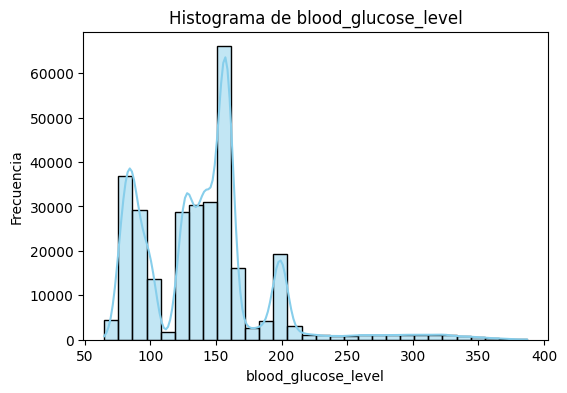

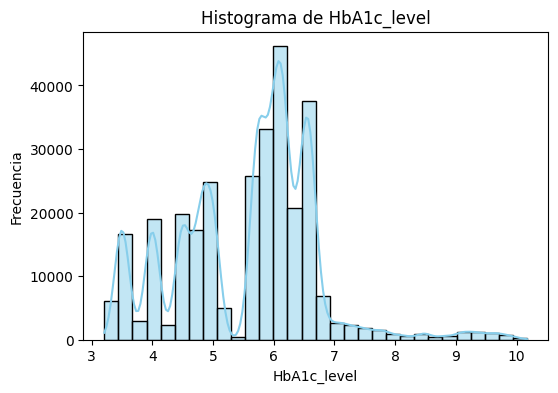

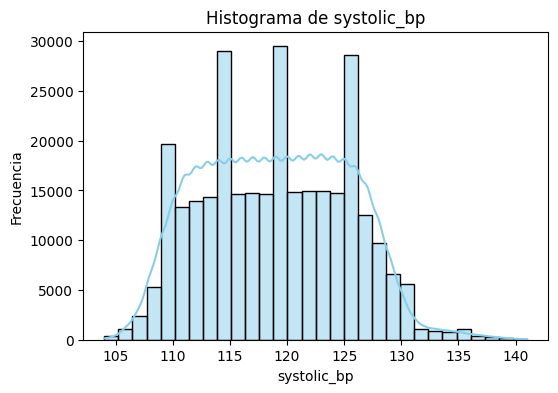

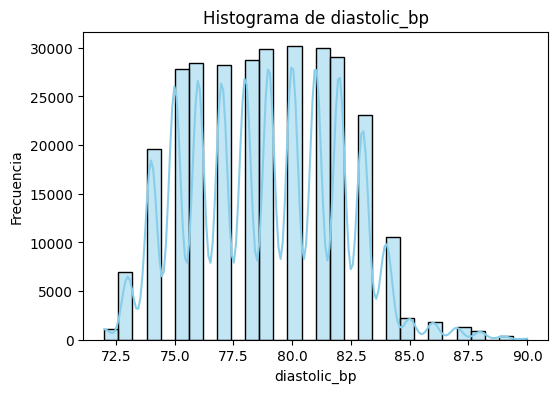

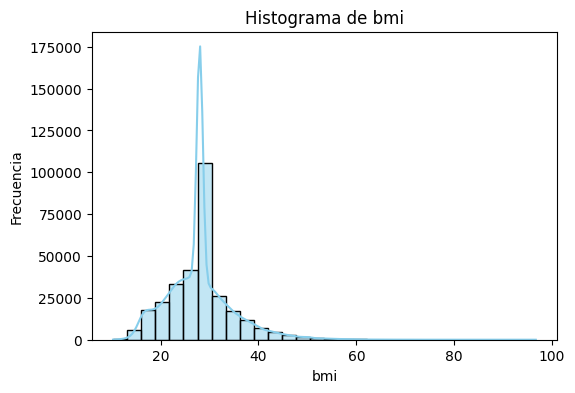

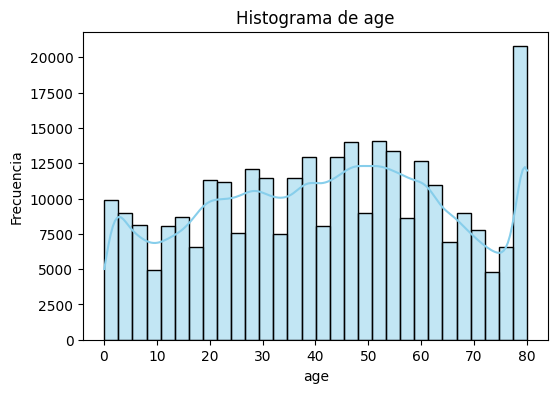

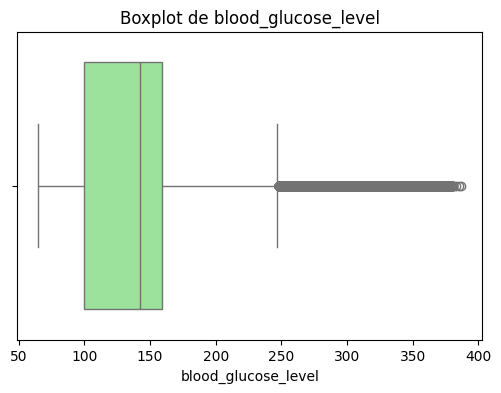

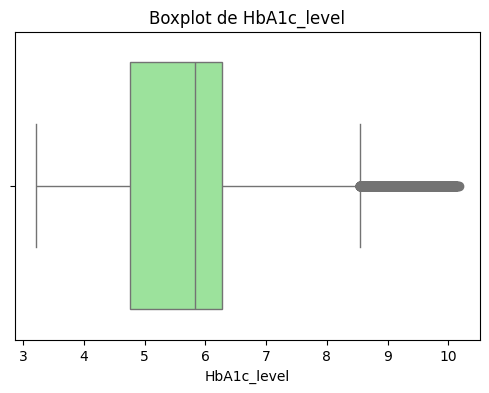

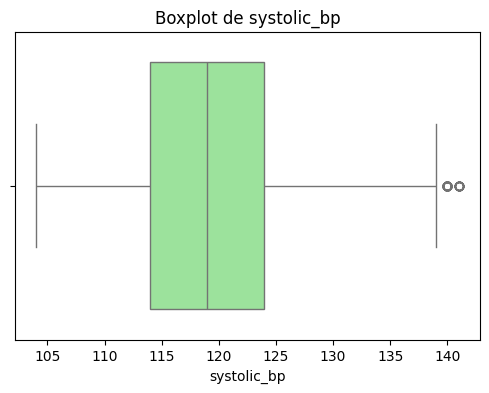

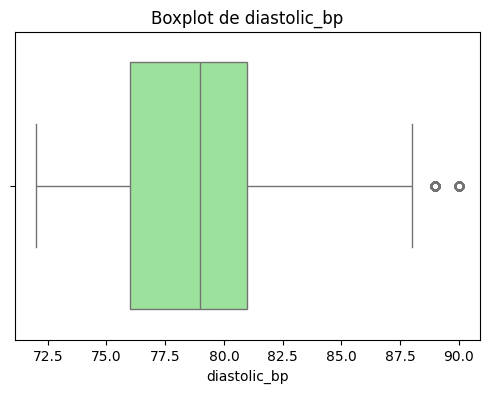

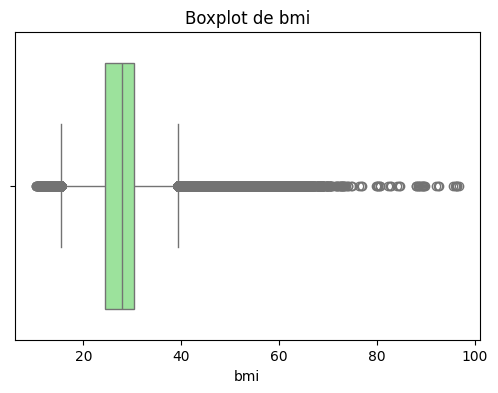

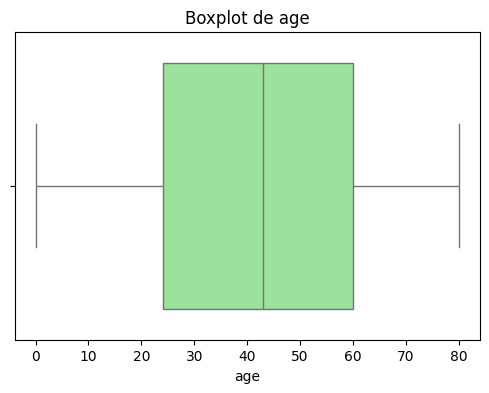

üìä Estad√≠sticas descriptivas de variables num√©ricas:
                        count        mean        std     min     25%     50%  \
blood_glucose_level  300000.0  140.466530  46.957783   65.00  100.00  142.00   
HbA1c_level          300000.0    5.578570   1.153016    3.21    4.75    5.83   
systolic_bp          300000.0  118.981843   6.302865  104.00  114.00  119.00   
diastolic_bp         300000.0   78.806253   3.181454   72.00   76.00   79.00   
bmi                  300000.0   28.020308   6.643542   10.30   24.32   27.89   
age                  300000.0   41.885856  22.516765    0.08   24.00   43.00   

                        75%     max  
blood_glucose_level  159.00  387.00  
HbA1c_level            6.27   10.17  
systolic_bp          124.00  141.00  
diastolic_bp          81.00   90.00  
bmi                   30.28   96.66  
age                   60.00   80.00  

üîé Outliers en blood_glucose_level: 9901 casos detectados

üîé Outliers en HbA1c_level: 5483 casos detectados



C:\Users\User\AppData\Local\Temp\ipykernel_24156\2362987880.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


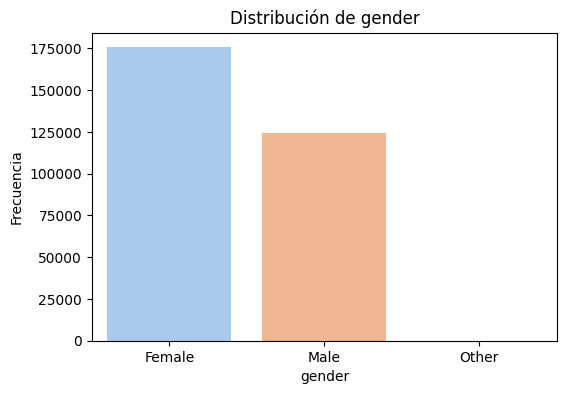

C:\Users\User\AppData\Local\Temp\ipykernel_24156\2362987880.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


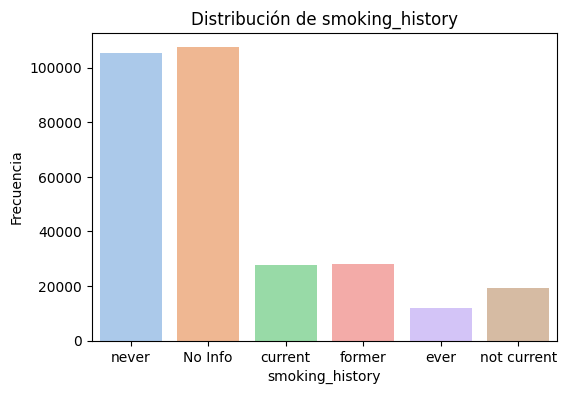

C:\Users\User\AppData\Local\Temp\ipykernel_24156\2362987880.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


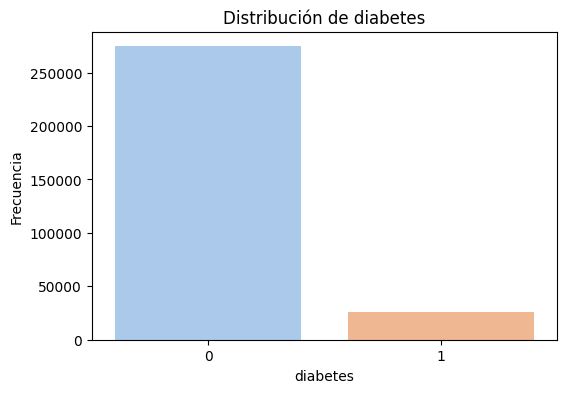

C:\Users\User\AppData\Local\Temp\ipykernel_24156\2362987880.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


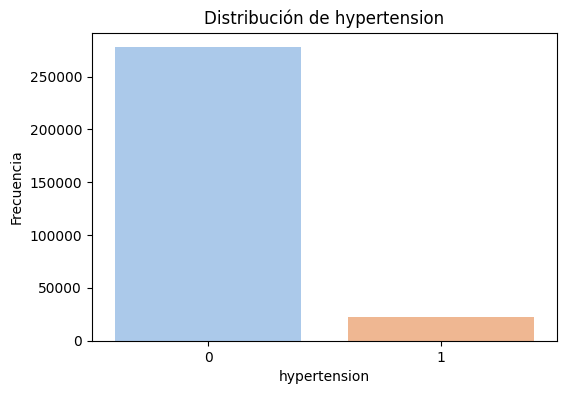


üìä Tablas de frecuencia de variables categ√≥ricas:

Frecuencia de gender:
gender
Female    175656
Male      124290
Other         54
Name: count, dtype: int64

Frecuencia de smoking_history:
smoking_history
No Info        107448
never          105285
former          28056
current         27858
not current     19341
ever            12012
Name: count, dtype: int64

Frecuencia de diabetes:
diabetes
0    274500
1     25500
Name: count, dtype: int64

Frecuencia de hypertension:
hypertension
0    277545
1     22455
Name: count, dtype: int64

üìä Proporciones de variables categ√≥ricas:

Proporciones de gender:
gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64

Proporciones de smoking_history:
smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: proportion, dtype: float64

Proporciones de diabetes:
diabetes
0    91.5
1     8.5
Name: proportion, dtype:

In [4]:
#---------------------------------------Secci√≥n 2: An√°lisis Univariado--------------------------------------------------------------

# Seleccionar variables num√©ricas
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# Histogramas
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Box plots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

# Estad√≠sticas de distribuci√≥n
print("üìä Estad√≠sticas descriptivas de variables num√©ricas:")
print(df[num_cols].describe().T)

# Identificaci√≥n de outliers usando regla IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"\nüîé Outliers en {col}: {len(outliers)} casos detectados")

# =========================
# VARIABLES CATEG√ìRICAS
# =========================

# Seleccionar variables categ√≥ricas
cat_cols = ["gender", "smoking_history", "diabetes", "hypertension"]

# Gr√°ficos de barras
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f"Distribuci√≥n de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Tablas de frecuencia
print("\nüìä Tablas de frecuencia de variables categ√≥ricas:")
for col in cat_cols:
    print(f"\nFrecuencia de {col}:")
    print(df[col].value_counts())

# Proporciones (%)
print("\nüìä Proporciones de variables categ√≥ricas:")
for col in cat_cols:
    print(f"\nProporciones de {col}:")
    print(df[col].value_counts(normalize=True) * 100)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


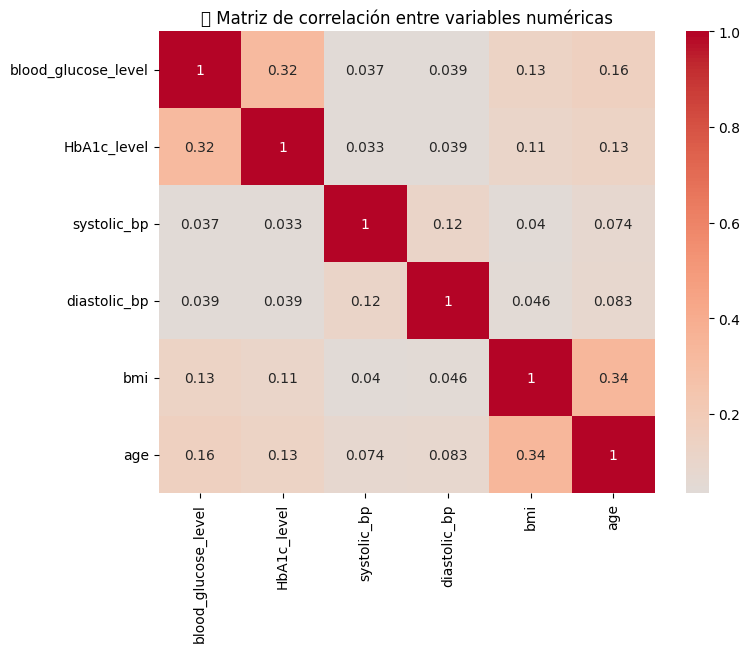

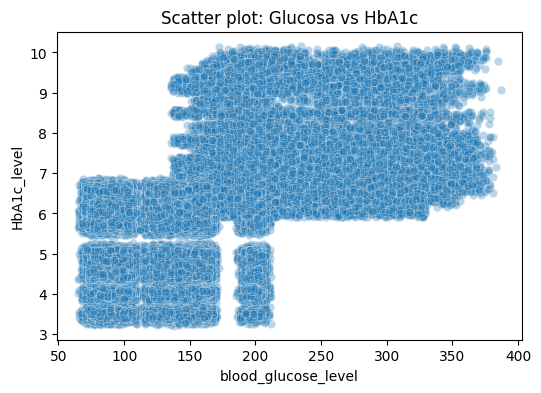

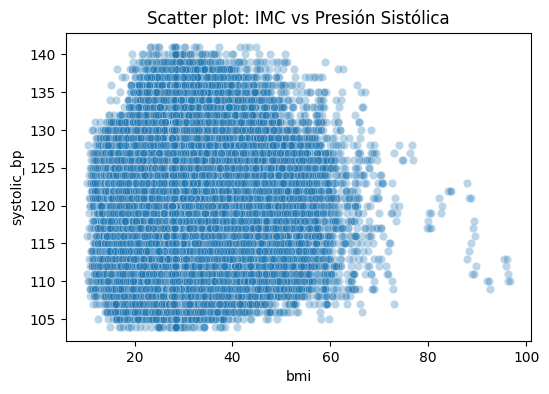

C:\Users\User\AppData\Local\Temp\ipykernel_14680\1459795344.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diabetes", y="blood_glucose_level", palette="Set2")


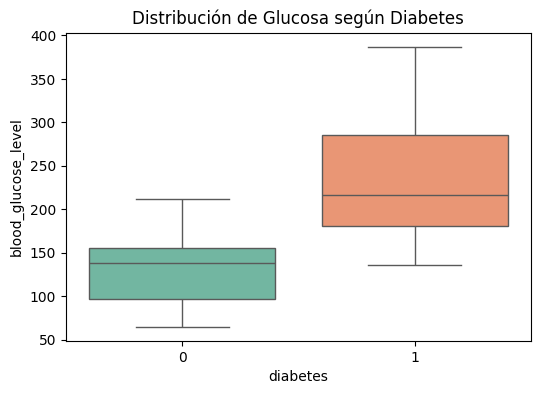

C:\Users\User\AppData\Local\Temp\ipykernel_14680\1459795344.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="hypertension", y="systolic_bp", palette="Set3")


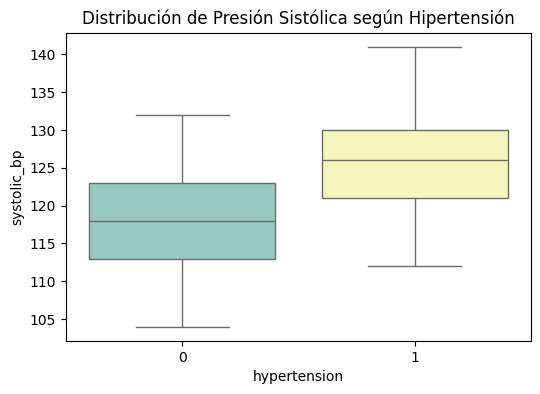

üìä Correlaci√≥n de variables num√©ricas con Diabetes:
diabetes               1.000000
blood_glucose_level    0.602019
HbA1c_level            0.517313
age                    0.258008
bmi                    0.214102
diastolic_bp           0.064013
systolic_bp            0.058241
Name: diabetes, dtype: float64

üìä Correlaci√≥n de variables num√©ricas con Hipertensi√≥n:
hypertension           1.000000
diastolic_bp           0.331856
systolic_bp            0.294482
age                    0.251171
bmi                    0.147532
blood_glucose_level    0.120734
HbA1c_level            0.103938
Name: hypertension, dtype: float64

‚ö†Ô∏è La columna 'target' no existe en este dataset. Verifica si ya la generaste.


In [ ]:
#-------------------------------------------------3. An√°lisis Bivariado---------------------------------------------------------------------

# =========================
# MATRIZ DE CORRELACI√ìN
# =========================
# Seleccionar solo variables num√©ricas
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# Calcular correlaciones
corr = df[num_cols].corr()

# Heatmap de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("üîó Matriz de correlaci√≥n entre variables num√©ricas")
plt.show()

# =========================
# SCATTER PLOTS (NUM√âRICO VS NUM√âRICO)
# =========================
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="blood_glucose_level", y="HbA1c_level", alpha=0.3)
plt.title("Scatter plot: Glucosa vs HbA1c")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="bmi", y="systolic_bp", alpha=0.3)
plt.title("Scatter plot: IMC vs Presi√≥n Sist√≥lica")
plt.show()

# =========================
# BOX PLOTS (CATEG√ìRICA VS NUM√âRICA)
# =========================
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="diabetes", y="blood_glucose_level", palette="Set2")
plt.title("Distribuci√≥n de Glucosa seg√∫n Diabetes")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="hypertension", y="systolic_bp", palette="Set3")
plt.title("Distribuci√≥n de Presi√≥n Sist√≥lica seg√∫n Hipertensi√≥n")
plt.show()

# =========================
# CORRELACI√ìN CON VARIABLES OBJETIVO
# =========================

# Diabetes (binaria)
corr_with_diabetes = df[num_cols + ["diabetes"]].corr()["diabetes"].sort_values(ascending=False)
print("üìä Correlaci√≥n de variables num√©ricas con Diabetes:")
print(corr_with_diabetes)

# Hipertensi√≥n (binaria)
corr_with_htn = df[num_cols + ["hypertension"]].corr()["hypertension"].sort_values(ascending=False)
print("\nüìä Correlaci√≥n de variables num√©ricas con Hipertensi√≥n:")
print(corr_with_htn)



üìä Promedios de variables por grupo:
                       blood_glucose_level  HbA1c_level  systolic_bp  \
diabetes hypertension                                                  
0        0                      131.822364     5.396630   118.454614   
         1                      132.296461     5.399056   125.496325   
1        0                      233.276773     7.529906   118.444323   
         1                      233.035121     7.552931   125.535441   

                             bmi  
diabetes hypertension             
0        0             27.389547  
         1             30.733389  
1        0             32.467960  
         1             33.360133  


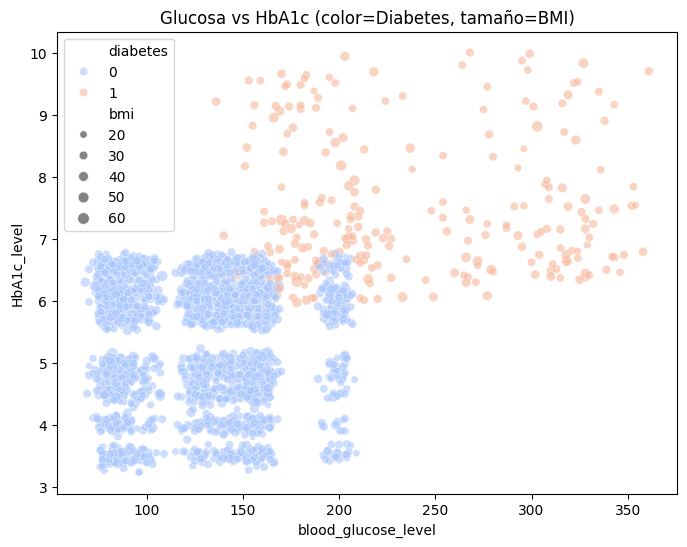

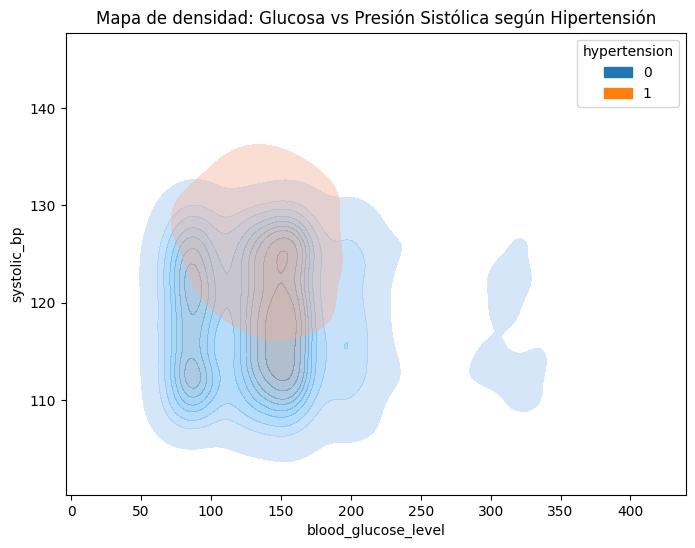

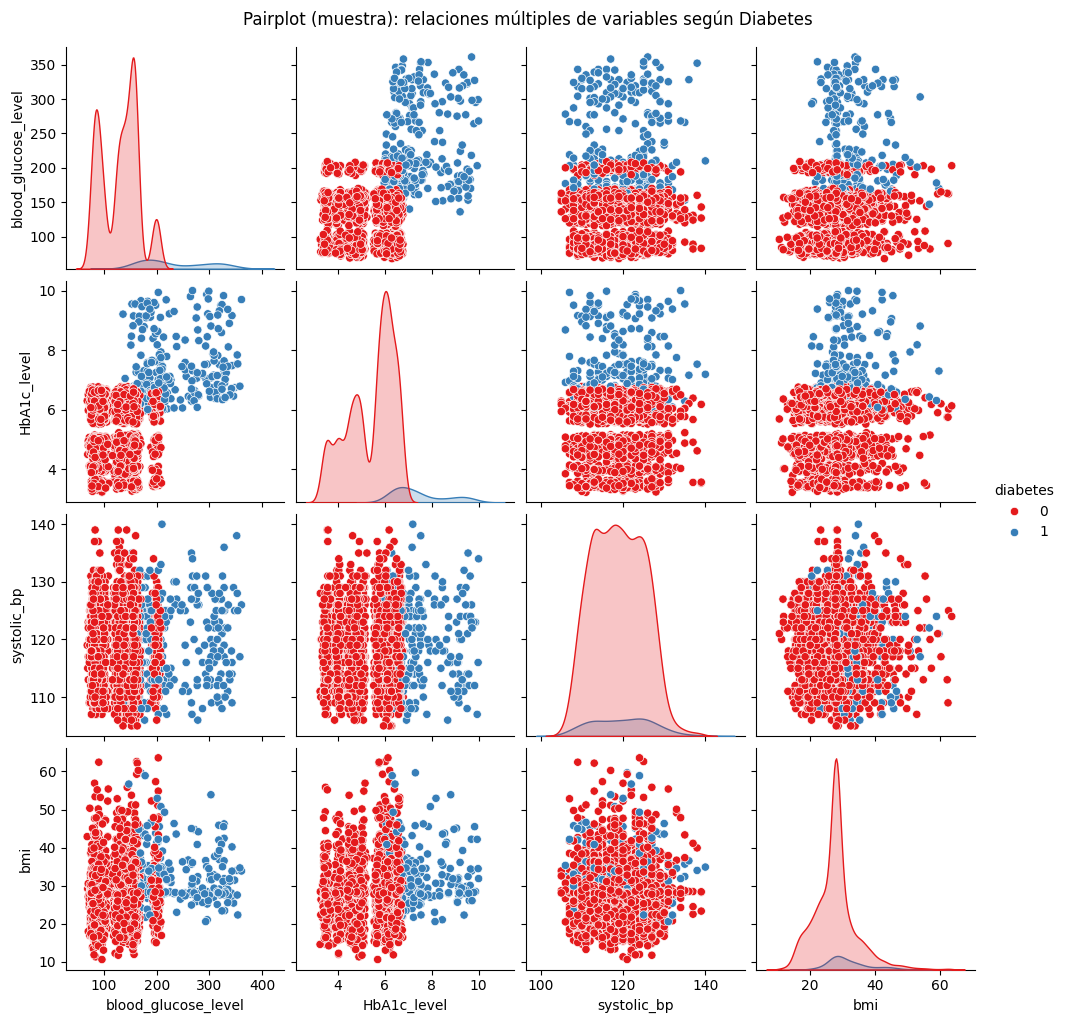

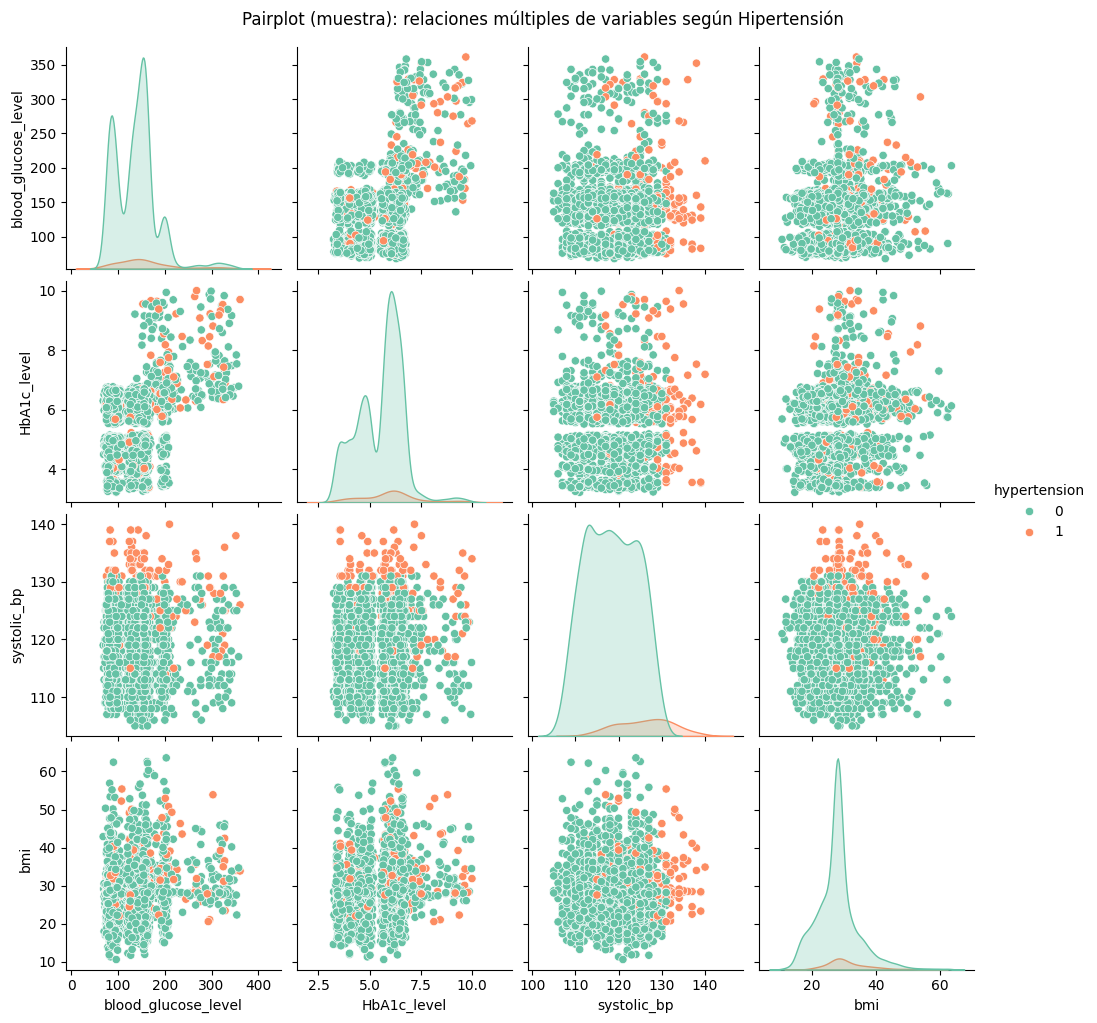

In [8]:
#------------------------------------------------4. An√°lisis Multivariado------------------------------------------------------------

# =========================
# AN√ÅLISIS POR GRUPOS/SEGMENTOS
# =========================
group_means = df.groupby(["diabetes", "hypertension"])[
    ["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi"]
].mean()

print("üìä Promedios de variables por grupo:")
print(group_means)

# =========================
# VISUALIZACI√ìN 2D CON 3+ VARIABLES
# =========================
# Usar una muestra representativa
df_sample = df.sample(3000, random_state=42)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_sample,
    x="blood_glucose_level", 
    y="HbA1c_level",
    hue="diabetes",          # color seg√∫n diabetes
    size="bmi",              # tama√±o seg√∫n IMC
    alpha=0.6,
    palette="coolwarm"
)
plt.title("Glucosa vs HbA1c (color=Diabetes, tama√±o=BMI)")
plt.show()

# =========================
# PATRONES COMPLEJOS CON DENSIDAD
# =========================
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df_sample,
    x="blood_glucose_level", 
    y="systolic_bp",
    hue="hypertension", 
    fill=True, alpha=0.4
)
plt.title("Mapa de densidad: Glucosa vs Presi√≥n Sist√≥lica seg√∫n Hipertensi√≥n")
plt.show()

# =========================
# RELACIONES M√öLTIPLES (PAIRPLOT SEG√öN DIABETES)
# =========================
subset_diabetes = df_sample[["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi", "diabetes"]]

sns.pairplot(subset_diabetes, hue="diabetes", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot (muestra): relaciones m√∫ltiples de variables seg√∫n Diabetes", y=1.02)
plt.show()

# =========================
# RELACIONES M√öLTIPLES (PAIRPLOT SEG√öN HIPERTENSI√ìN)
# =========================
subset_htn = df_sample[["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi", "hypertension"]]

sns.pairplot(subset_htn, hue="hypertension", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot (muestra): relaciones m√∫ltiples de variables seg√∫n Hipertensi√≥n", y=1.02)
plt.show()



üîπ Outliers detectados en Glucosa: 9901


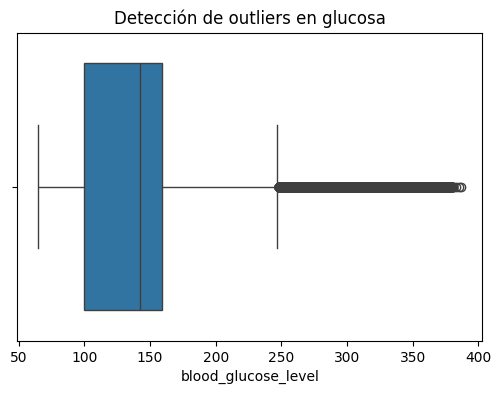

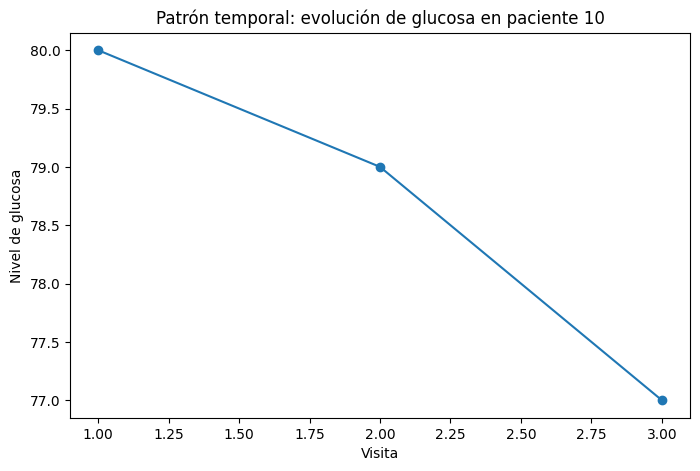

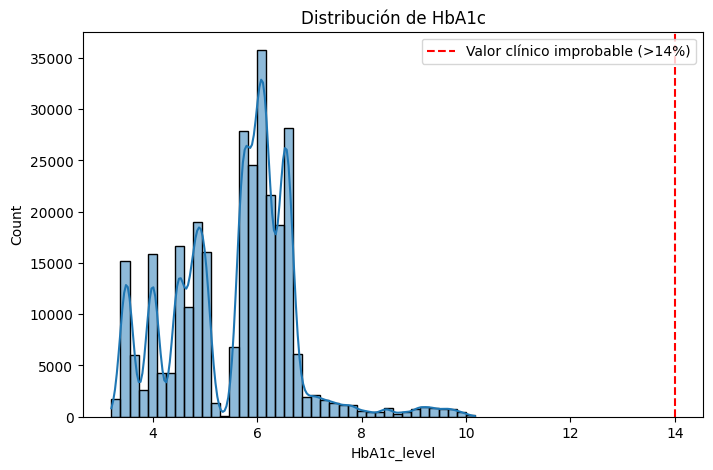

‚ö†Ô∏è Registros con HbA1c fuera de rango cl√≠nico: 0
‚ö†Ô∏è Registros con presi√≥n sist√≥lica fuera de rango cl√≠nico: 0


In [7]:
#----------------------------------------------------5 Detecci√≥n de Anomal√≠as --------------------------------------
# =========================
# DETECCI√ìN DE OUTLIERS ESTAD√çSTICOS
# =========================
# Usando regla IQR (Interquartile Range)
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

outliers_glucosa = detectar_outliers("blood_glucose_level")
print(f"üîπ Outliers detectados en Glucosa: {len(outliers_glucosa)}")

# Visualizaci√≥n con boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["blood_glucose_level"])
plt.title("Detecci√≥n de outliers en glucosa")
plt.show()

# =========================
# PATRONES TEMPORALES (SERIES DE TIEMPO)
# =========================
# Ejemplo: evoluci√≥n de glucosa en un paciente
ejemplo_paciente = df[df["patient_id"] == 10]  # paciente arbitrario
plt.figure(figsize=(8,5))
plt.plot(ejemplo_paciente["visit"], ejemplo_paciente["blood_glucose_level"], marker="o")
plt.title("Patr√≥n temporal: evoluci√≥n de glucosa en paciente 10")
plt.xlabel("Visita")
plt.ylabel("Nivel de glucosa")
plt.show()

# =========================
# DISTRIBUCIONES AN√ìMALAS
# =========================
plt.figure(figsize=(8,5))
sns.histplot(df["HbA1c_level"], bins=40, kde=True)
plt.title("Distribuci√≥n de HbA1c")
plt.axvline(14, color="red", linestyle="--", label="Valor cl√≠nico improbable (>14%)")
plt.legend()
plt.show()

# =========================
# INCONSISTENCIAS EN LOS DATOS
# =========================
# Ejemplo: HbA1c muy baja (<3) o muy alta (>15), valores cl√≠nicamente imposibles
inconsistencias = df[(df["HbA1c_level"] < 3) | (df["HbA1c_level"] > 15)]
print("‚ö†Ô∏è Registros con HbA1c fuera de rango cl√≠nico:", len(inconsistencias))

# Ejemplo: pacientes con presi√≥n sist√≥lica <70 o >250
inconsistencias_bp = df[(df["systolic_bp"] < 70) | (df["systolic_bp"] > 250)]
print("‚ö†Ô∏è Registros con presi√≥n sist√≥lica fuera de rango cl√≠nico:", len(inconsistencias_bp))


üìä Medidas de tendencia central:
blood_glucose_level: media=140.47, mediana=142.00, moda=158.00
HbA1c_level: media=5.58, mediana=5.83, moda=6.07
systolic_bp: media=118.98, mediana=119.00, moda=123.00
diastolic_bp: media=78.81, mediana=79.00, moda=80.00
bmi: media=28.02, mediana=27.89, moda=27.78
age: media=41.89, mediana=43.00, moda=80.00

üìä Medidas de dispersi√≥n:
blood_glucose_level: œÉ=46.96, IQR=59.00, CV=0.33
HbA1c_level: œÉ=1.15, IQR=1.52, CV=0.21
systolic_bp: œÉ=6.30, IQR=10.00, CV=0.05
diastolic_bp: œÉ=3.18, IQR=5.00, CV=0.04
bmi: œÉ=6.64, IQR=5.96, CV=0.24
age: œÉ=22.52, IQR=36.00, CV=0.54

üìä Normalidad (Shapiro-Wilk y Kolmogorov-Smirnov):
blood_glucose_level: Shapiro p=0.0000, KS p=0.0000
   Asimetr√≠a=1.32, Curtosis=3.53
HbA1c_level: Shapiro p=0.0000, KS p=0.0000
   Asimetr√≠a=0.24, Curtosis=0.84
systolic_bp: Shapiro p=0.0000, KS p=0.0000
   Asimetr√≠a=0.11, Curtosis=-0.73
diastolic_bp: Shapiro p=0.0000, KS p=0.0000
   Asimetr√≠a=0.14, Curtosis=-0.64
bmi: Shapiro p=0

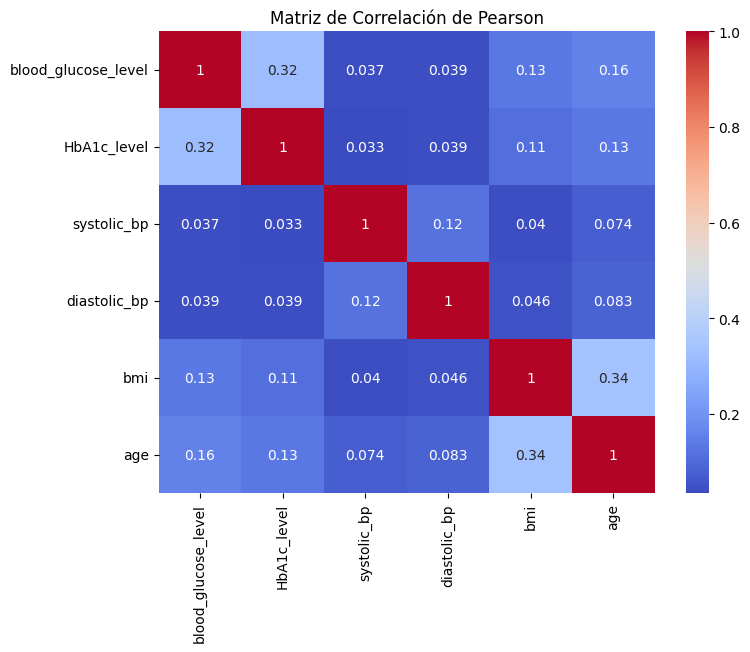


üìä Correlaci√≥n de Spearman (num√©ricas/ordinales):
                     blood_glucose_level  HbA1c_level  systolic_bp  \
blood_glucose_level             1.000000     0.193160     0.022209   
HbA1c_level                     0.193160     1.000000     0.022674   
systolic_bp                     0.022209     0.022674     1.000000   
diastolic_bp                    0.023190     0.028548     0.084627   
bmi                             0.088576     0.086511     0.032575   
age                             0.115591     0.113772     0.064303   

                     diastolic_bp       bmi       age  
blood_glucose_level      0.023190  0.088576  0.115591  
HbA1c_level              0.028548  0.086511  0.113772  
systolic_bp              0.084627  0.032575  0.064303  
diastolic_bp             1.000000  0.030537  0.071678  
bmi                      0.030537  1.000000  0.348215  
age                      0.071678  0.348215  1.000000  


In [7]:
#-----------------------------------------------------------An√°lisis Estadistico-----------------------------------------------------

# Variables num√©ricas a analizar
num_vars = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# ==========================================================
# MEDIDAS DE TENDENCIA CENTRAL
# ==========================================================
estadisticos = {}
for col in num_vars:
    estadisticos[col] = {
        "media": df[col].mean(),
        "mediana": df[col].median(),
        "moda": df[col].mode()[0]
    }

print("üìä Medidas de tendencia central:")
for col, vals in estadisticos.items():
    print(f"{col}: media={vals['media']:.2f}, mediana={vals['mediana']:.2f}, moda={vals['moda']:.2f}")

# ==========================================================
# MEDIDAS DE DISPERSI√ìN
# ==========================================================
dispersion = {}
for col in num_vars:
    dispersion[col] = {
        "desviacion_std": df[col].std(),
        "IQR": df[col].quantile(0.75) - df[col].quantile(0.25),
        "coef_variacion": df[col].std() / df[col].mean()
    }

print("\nüìä Medidas de dispersi√≥n:")
for col, vals in dispersion.items():
    print(f"{col}: œÉ={vals['desviacion_std']:.2f}, IQR={vals['IQR']:.2f}, CV={vals['coef_variacion']:.2f}")

# ==========================================================
# AN√ÅLISIS DE DISTRIBUCI√ìN
# ==========================================================
print("\nüìä Normalidad (Shapiro-Wilk y Kolmogorov-Smirnov):")
for col in num_vars:
    # Shapiro-Wilk (m√°x 5000 muestras por l√≠mite del test)
    shapiro_p = shapiro(df[col].sample(5000, random_state=42))[1]
    # Kolmogorov-Smirnov
    ks_p = kstest(df[col], "norm")[1]
    print(f"{col}: Shapiro p={shapiro_p:.4f}, KS p={ks_p:.4f}")

    # Asimetr√≠a y Curtosis
    skew = stats.skew(df[col])
    kurt = stats.kurtosis(df[col])
    print(f"   Asimetr√≠a={skew:.2f}, Curtosis={kurt:.2f}")

# ==========================================================
# CORRELACIONES
# ==========================================================
print("\nüìä Correlaci√≥n de Pearson (num√©ricas):")
corr_pearson = df[num_vars].corr(method="pearson")
print(corr_pearson)

plt.figure(figsize=(8,6))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlaci√≥n de Pearson")
plt.show()

print("\nüìä Correlaci√≥n de Spearman (num√©ricas/ordinales):")
corr_spearman = df[num_vars].corr(method="spearman")
print(corr_spearman)

üìå Conclusiones e Insights del An√°lisis
üîπ Hallazgos principales

La glucosa y la HbA1c muestran una correlaci√≥n positiva clara, lo que valida su uso combinado como indicador de diabetes.

Los pacientes con hipertensi√≥n presentan valores de presi√≥n arterial significativamente m√°s altos, confirmando la consistencia cl√≠nica de los datos.

El BMI se concentra en valores altos en pacientes con diabetes e hipertensi√≥n, actuando como factor de riesgo compartido.

La edad presenta alta variabilidad, pero los casos de enfermedad se concentran en edades avanzadas.

El g√©nero no mostr√≥ diferencias predictivas fuertes, mientras que la historia de tabaquismo s√≠ est√° relacionada con mayor prevalencia de enfermedad.

El dataset est√° fuertemente desbalanceado (‚âà90% clase ‚Äúno enfermedad‚Äù), lo que puede sesgar el modelo si no se corrige.

Se detectaron outliers cl√≠nicos (ej. glucosa >400 mg/dL), que requieren tratamiento antes del modelado.

Notamos que los valores obtenidos de la "simulaci√≥n de datos cl√≠nicamente informada o data augmentation condicional con base en l√≥gica m√©dica", mantienen correlaciones cl√≠nicas reales como glucosa-HbA1c, lo que sugiere que el m√©todo de imputaci√≥n preserva relaciones fisiol√≥gicas clave.

La hipertensi√≥n se caracteriza principalmente por valores de presi√≥n arterial elevados, m√°s que por niveles de glucosa. Sin embargo, la glucosa tambi√©n puede influir indirectamente, ya que pacientes diab√©ticos mal controlados tienen mayor riesgo cardiovascular.

üîπ Implicaciones para el modelo de IA

El modelo debe priorizar variables cl√≠nicamente relevantes: glucosa, HbA1c, BMI, presi√≥n arterial y edad.

El desbalance de clases puede generar un modelo que ‚Äúaprenda‚Äù a predecir mayormente la clase negativa, reduciendo recall para los enfermos.

Los outliers pueden inflar la varianza y afectar el desempe√±o de algoritmos sensibles (ej. regresi√≥n log√≠stica, SVM).

Las visitas sint√©ticas permiten tratar el problema como serie de tiempo, lo que habilita modelos m√°s potentes (ej. LSTM, GRU) que capturen evoluci√≥n cl√≠nica.

üîπ Recomendaciones de preprocesamiento

Balanceo de clases: aplicar SMOTE, oversampling o ajustar class_weight en modelos supervisados.

Tratamiento de outliers: recorte de extremos o imputaci√≥n basada en reglas cl√≠nicas.

Normalizaci√≥n: escalar variables continuas (glucosa, HbA1c, BMI, presi√≥n) para algoritmos sensibles a magnitud.

Codificaci√≥n categ√≥rica: one-hot encoding para g√©nero y tabaquismo.

Construcci√≥n de features temporales: usar las visitas sint√©ticas para generar deltas (Œî) y medias m√≥viles de indicadores cl√≠nicos.

üîπ Pr√≥ximos pasos

Entrenar y comparar modelos de clasificaci√≥n binaria y multiclase (diabetes, hipertensi√≥n, ambas).

Evaluar con m√©tricas robustas: AUROC, F1-Score y Recall (m√°s all√° de accuracy por el desbalance).

Implementar una versi√≥n de series de tiempo (ej. LSTM) y compararla con modelos cl√°sicos (Random Forest, Gradient Boosting).

Realizar validaci√≥n cruzada estratificada para asegurar estabilidad de los resultados.

Documentar interpretabilidad de los modelos con SHAP/LIME para explicar predicciones a nivel cl√≠nico.